In [13]:
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN 
from sklearn.metrics import silhouette_score 
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import logging
logging.getLogger('matplotlib.font_manager').disabled = True

credit = pd.read_csv('credit_card.csv') #Load dataset
credit.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [14]:
print('Data null : \n', credit.isnull().sum())
print('Data kosong : \n', credit.empty)
print('Data nan : \n', credit.isna().sum())

Data null : 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64
Data kosong : 
 False
Data nan : 
 Sl_No                  0
Customer Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64


In [15]:
df_credit = credit.drop(columns=['Customer Key','Sl_No'],axis=1)
df_credit.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,100000,2,1,1,0
1,50000,3,0,10,9
2,50000,7,1,3,4
3,30000,5,1,1,4
4,100000,6,0,12,3
5,20000,3,0,1,8
6,100000,5,0,11,2
7,15000,3,0,1,1
8,5000,2,0,2,2
9,3000,4,0,1,7


<Axes: >

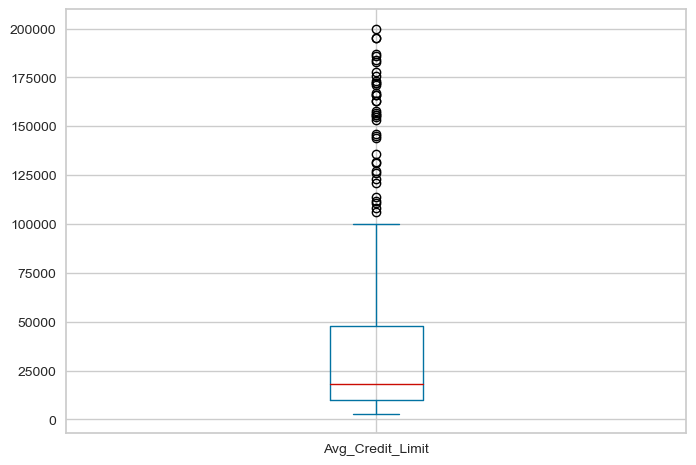

In [16]:
df_credit['Avg_Credit_Limit'].plot(kind='box')


In [17]:
from pandas.api.types import is_numeric_dtype
def remove_outlier(df_in, col_name):
  df_out = df_in.copy()
  if is_numeric_dtype(df_in[col_name]):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3 - q1
    upper_bound = q3 + (iqr * 1.5)
    lower_bound = q1 - (iqr * 1.5)
    df_out = df_out.loc[(df_out[col_name] >= lower_bound) & (df_out[col_name] <= upper_bound)]
  return df_out

credit_clean = remove_outlier(df_credit, "Avg_Credit_Limit")
print("Jumlah baris DataFrame sebelum dibuang outlier:", df_credit.shape[0])
print("Jumlah baris DataFrame sesudah dibuang outlier:", credit_clean.shape[0])

Jumlah baris DataFrame sebelum dibuang outlier: 660
Jumlah baris DataFrame sesudah dibuang outlier: 621


<Axes: >

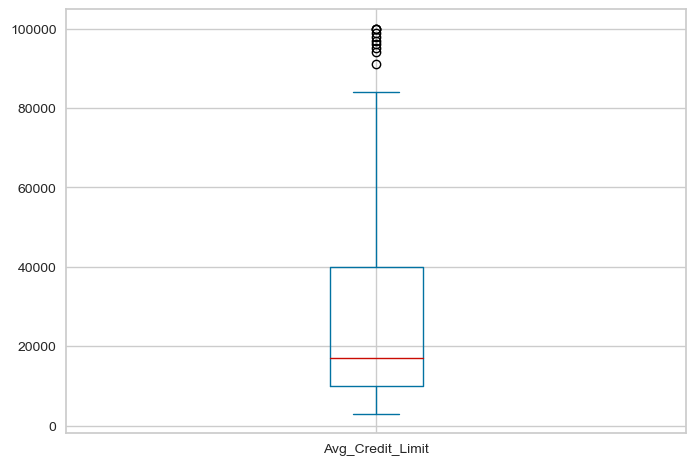

In [18]:
credit_clean['Avg_Credit_Limit'].plot(kind='box')

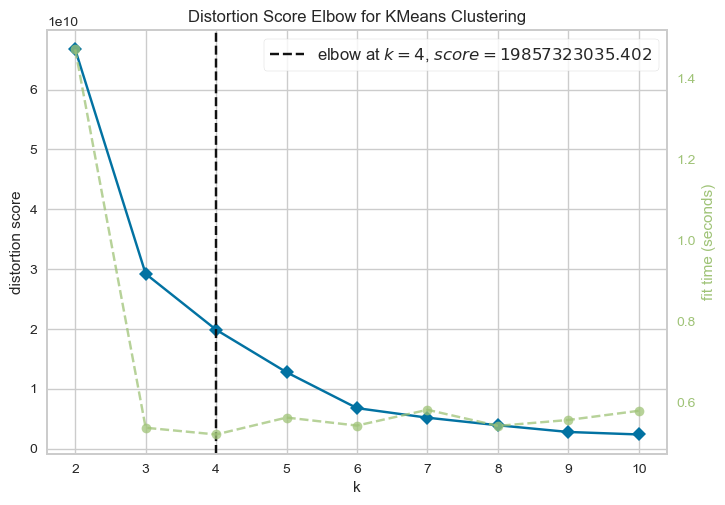

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [19]:
from yellowbrick.cluster import KElbowVisualizer
kMeansC = KMeans (random_state=0)
vis = KElbowVisualizer (kMeansC, k=(2,11))
vis.fit(credit_clean)
vis.show()

Silhouette Score K-Means for 2 clusters : 0.7275517813087928
Silhouette Score K-Means for 3 clusters : 0.7077390094589705
Silhouette Score K-Means for 4 clusters : 0.7094276225317143
Silhouette Score K-Means for 5 clusters : 0.5986950720392292
Silhouette Score K-Means for 6 clusters : 0.6271336425919736
Silhouette Score K-Means for 7 clusters : 0.6193411786974923
Silhouette Score K-Means for 8 clusters : 0.6275593653509658
Silhouette Score K-Means for 9 clusters : 0.6101535358217619
Silhouette Score K-Means for 10 clusters : 0.6003448093990253


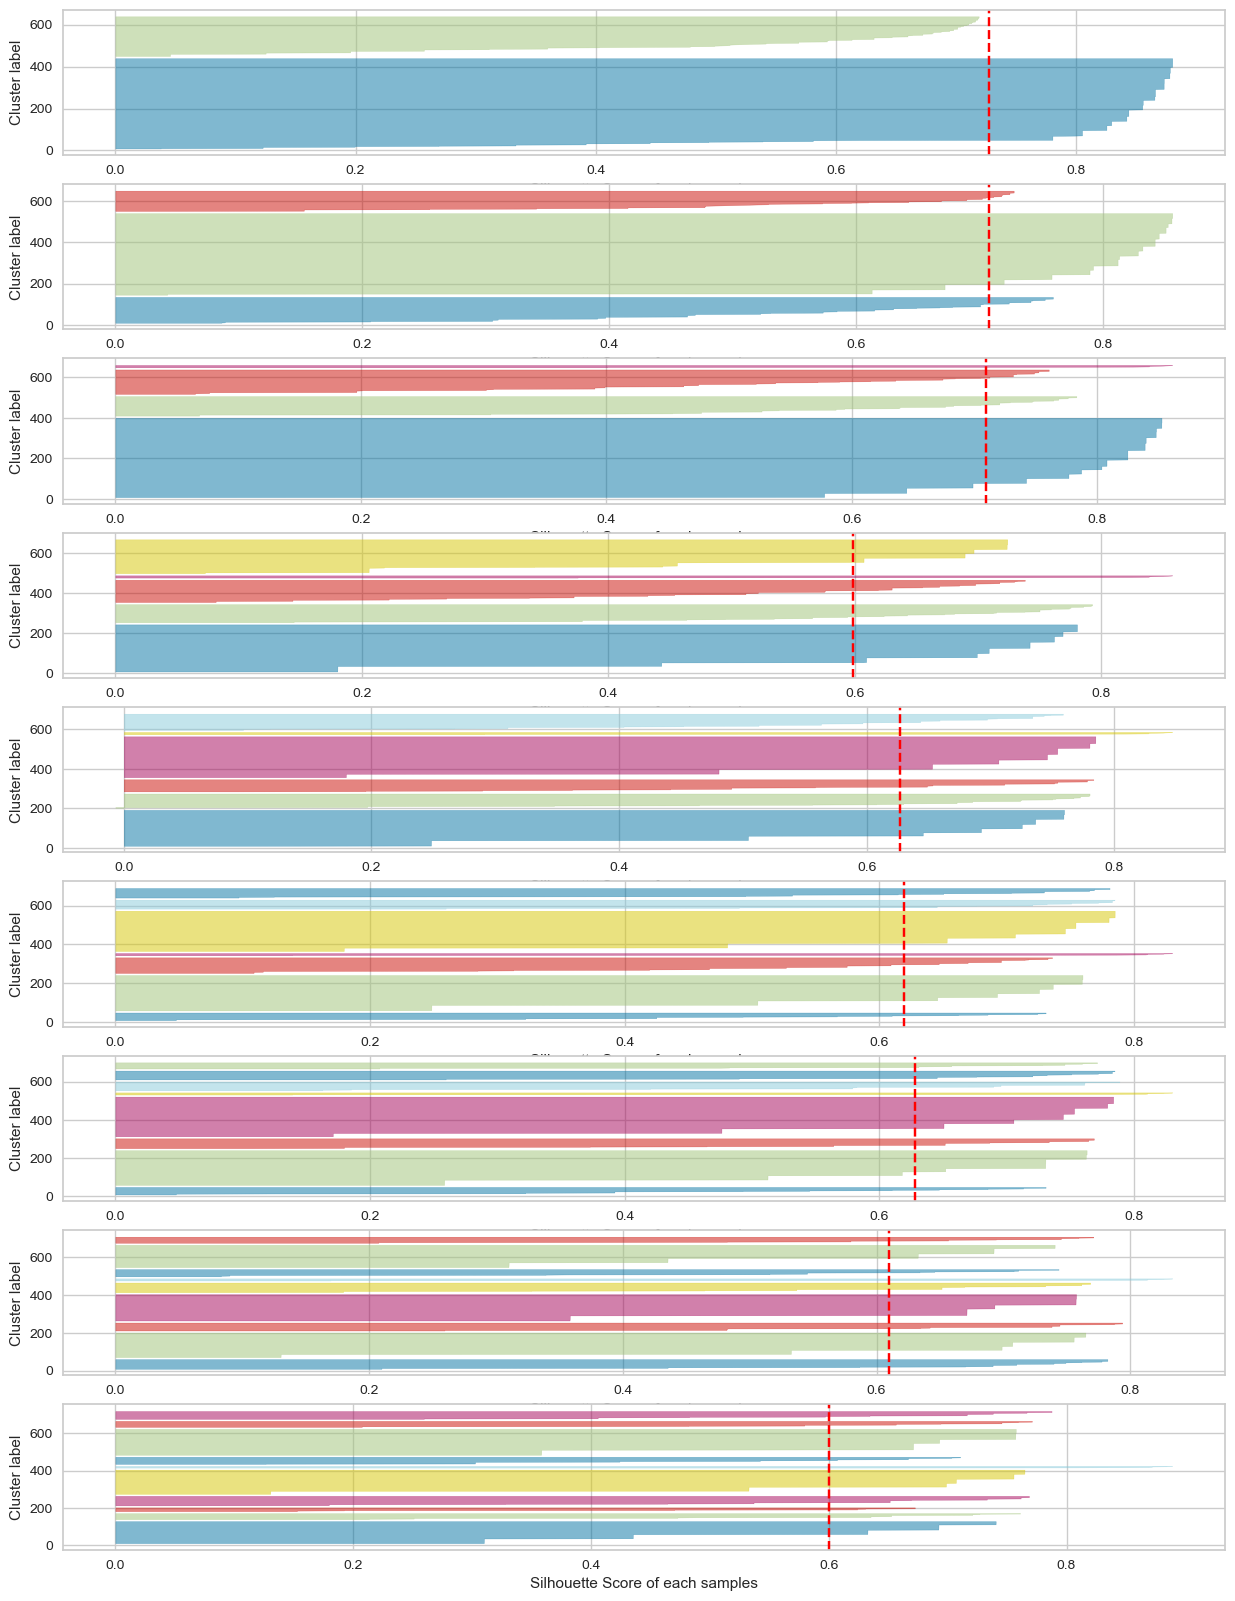

In [20]:
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(9,1, figsize=(15,20))
for k in np.arange(2,11):
    kMeansC = KMeans(n_clusters=k, init='k-means++', random_state=7)
    KM_clusters=kMeansC.fit_predict(credit_clean)
    print("Silhouette Score K-Means for", k, "clusters :", silhouette_score(credit_clean, KM_clusters))
    sil_vis = SilhouetteVisualizer(kMeansC, colors='yellowbrick', ax=ax[k-2])
    sil_vis.fit(credit_clean)
    ax[k-2].set(xlabel="Silhouette Score of each samples", ylabel="Cluster label")

In [21]:
credit_clean.columns

Index(['Avg_Credit_Limit', 'Total_Credit_Cards', 'Total_visits_bank',
       'Total_visits_online', 'Total_calls_made'],
      dtype='object')

In [22]:
kmeans= KMeans(n_clusters = 3, init='k-means++', random_state=7)
K_clusters = kmeans.fit_predict(credit_clean)

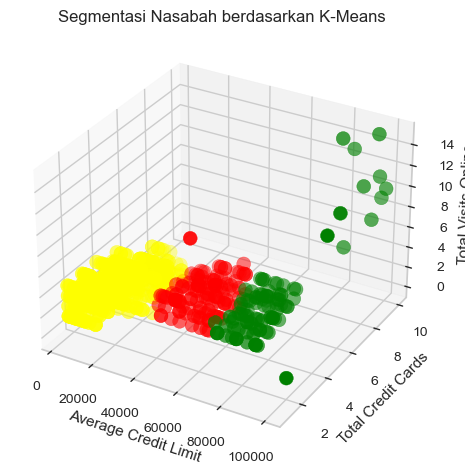

Silhouette Score K-Means: 0.708


In [23]:
fig = plt.figure()
ax = plt.axes (projection='3d')

cluster_colors = {0: 'red', 1: 'yellow', 2: 'green', 3: 'blue', 4: 'magenta', 5: 'black', 6: 'cyan'}
ax.scatter(credit_clean['Avg_Credit_Limit'], credit_clean['Total_Credit_Cards'], credit_clean['Total_visits_online'],
c=[cluster_colors[i] for i in K_clusters], s=100)

plt.title('Segmentasi Nasabah berdasarkan K-Means')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()
print("Silhouette Score K-Means: %0.3f" % silhouette_score (credit_clean, K_clusters))

In [27]:
AGG = AgglomerativeClustering(n_clusters=3,linkage='ward')
Agg_clusters = AGG.fit_predict(credit_clean)

AttributeError: PathCollection.set() got an unexpected keyword argument 'C'

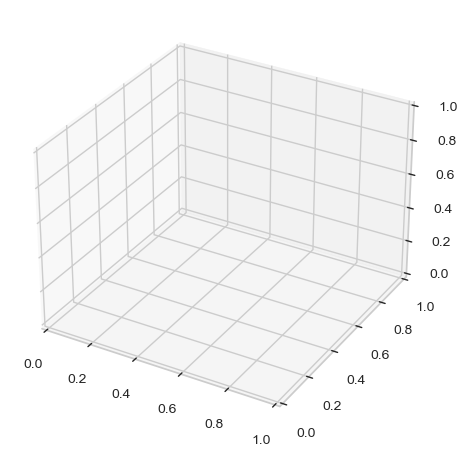

In [25]:
from matplotlib.colors import ListedColormap
import seaborn as sns

AGG = AgglomerativeClustering(n_clusters=3,linkage='ward')

AGG_clusters = AGG.fit_predict(credit_clean)
cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

fig = plt.figure()
ax = plt.axes (projection='3d')

ax.scatter (credit_clean['Avg_Credit_Limit'], credit_clean['Total_Credit_Cards'], credit_clean['Total_visits_online'],
C=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score (credit_clean, AGG_clusters))

In [28]:
AGG = AgglomerativeClustering(n_clusters=3,linkage='ward')
AGG_clusters = AGG.fit_predict(credit_clean)

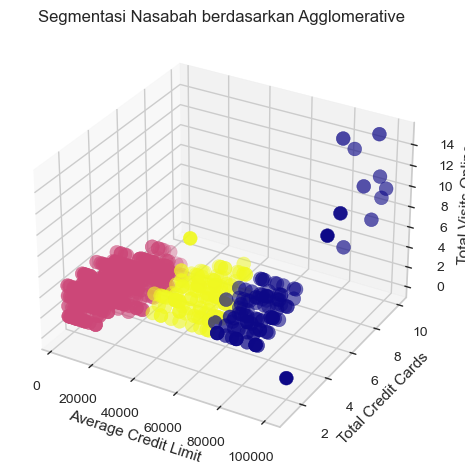

Silhouette Score K-Means: 0.705


In [29]:
from matplotlib.colors import ListedColormap
import seaborn as sns

AGG = AgglomerativeClustering(n_clusters=3,linkage='ward')

AGG_clusters = AGG.fit_predict(credit_clean)
cmap = ListedColormap(sns.color_palette("plasma", 256).as_hex())

fig = plt.figure()
ax = plt.axes (projection='3d')

ax.scatter (credit_clean['Avg_Credit_Limit'], credit_clean['Total_Credit_Cards'], credit_clean['Total_visits_online'],
            c=AGG_clusters, cmap=cmap, s=100)

plt.title('Segmentasi Nasabah berdasarkan Agglomerative')
ax.set_xlabel('Average Credit Limit')
ax.set_ylabel('Total Credit Cards')
ax.set_zlabel('Total Visits Online')
plt.show()

print("Silhouette Score K-Means: %0.3f" % silhouette_score (credit_clean, AGG_clusters))

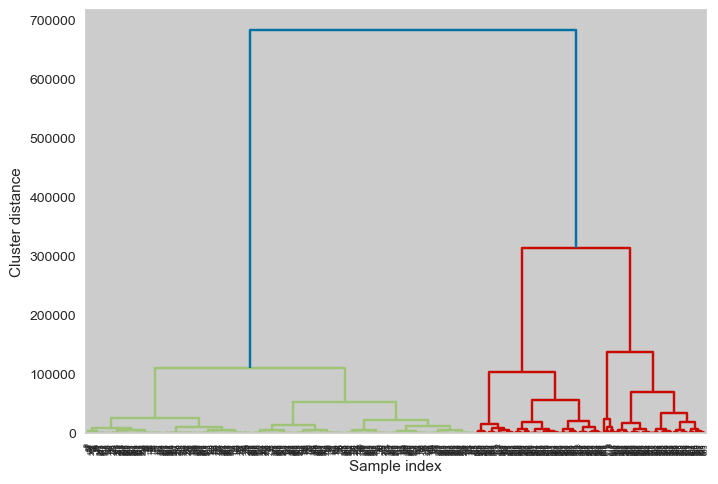

In [30]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_array = linkage(credit_clean,method='ward')
dendrogram(linkage_array)

plt.xlabel("Sample index")
plt.ylabel("Cluster distance")
plt.show()


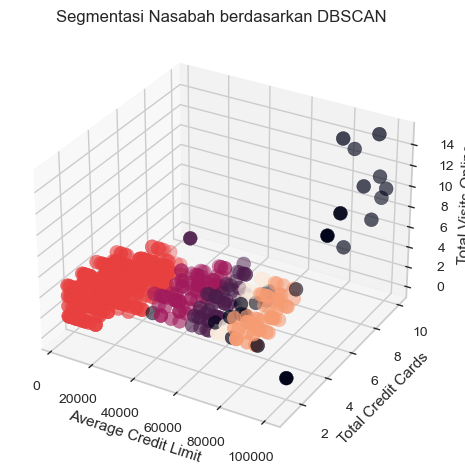

Silhouette Score K-Means: 0.657


In [31]:
DBSC = DBSCAN(min_samples=20, eps=2500)
DBSC_clusters = DBSC.fit_predict(credit_clean)

from matplotlib.colors import ListedColormap 
import seaborn as sns

cmap = ListedColormap(sns.color_palette("rocket", 256).as_hex()) 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(credit_clean['Avg_Credit_Limit'], credit_clean['Total_Credit_Cards'], credit_clean['Total_visits_online'], 
           c=DBSC_clusters, cmap=cmap, s=100)  

plt.title("Segmentasi Nasabah berdasarkan DBSCAN")
ax.set_xlabel("Average Credit Limit")  
ax.set_ylabel("Total Credit Cards")    
ax.set_zlabel("Total Visits Online")  
plt.show()  


print("Silhouette Score K-Means: %0.3f" % silhouette_score(credit_clean, DBSC_clusters))


In [32]:
import pickle

with open('KMeans_model.pkl', 'wb') as r:
    pickle.dump((kmeans),r)

with open('AGG_model.pkl', 'wb') as r:
    pickle.dump((AGG),r)

with open('DBSCAN_model.pkl', 'wb') as r:
    pickle.dump((DBSC),r)

print("Model berhasil disimpan")

Model berhasil disimpan
